## Monte Carlo Simulation of an Ideal Gas

Consider a cubic box of length $L$ on each side. The box is filled with gas with atoms of mass $m$. Each of these atoms have quantum states represented by three integer quantum numbers $n_x$, $n_y$ and $n_z$. The energy of each particle is thus, given by
$$ E(n_x, n_y, n_z) = \frac{\pi^2\hbar^2}{2mL^2}(n_x^2+n_y^2+n_z^2) $$
An ideal gas (let us assume made up of only one type of atom, or monoatomic) is a theoretical gas in which the molecules do not interact, except when there is collision. Let us say our gas in the box has $N$ such atoms. This allows us to obtain the total energy of the system as the sum of energies of individual particles as:
$$ E = \sum_{i=1}^N E(n_x^{(i)}, n_y^{(i)}, n_z^{(i)}) $$
where the index $i$ refers to a particular atom.  
This sum can be performed as is, in principle, on a computer, but it is not practical. The number of atoms is $N\sim10^{23}$, and operations involving such large numbers could easily exceed the capacity of powerful supercomputers. Hence, a Monte Carlo simulation is performed to calculate the total energy or internal energy of the gas, by generating random numbers, similar to Monte Carlo Integration.  

We start by choosing a move set, which is chosen as a set of all moves of a single atom to one of the six neighboring states, where $n_x$. $n_y$ or $n_z$ differs by $\pm1$.   

On each step of the Monte Carlo simulation:
* We will choose a particle at random,
* Choose one of the 3 quantum states, $n_x$, $n_y$, and $n_z$,
* Choose a random change by $+1$ or $-1$ for the chosen quantum state.

Below is the result of 250,000 Monte Carlo moves on an ideal gas containing $N=1000$ atoms, in a cube of side $L=1$ m. For simplicity, $m=\hbar=1$, and $k_BT=10$. We start by assuming all atoms in the gas occupy state $n_x=n_y=n_z=1$ (or the ground state).  
The atoms in the ideal gas must also obey Boltzmann probability distribution: $P(E_i) = e^{-E_i/k_BT}/Z$, where $Z=\sum_ie^{-E_i/k_BT}$. This gives us an acceptance probability:
$$ P_a = \begin{cases}
1 & E_j\leq E_i \\
e^{-(E_j-E_i)/k_BT} & E_j > E_i 
\end{cases}
$$
Simply put, the gas may remain in the same state or go back to a pervious state, but if it moves to a state with higher energy, it must do so in accordance with the Boltzmann probability distribution. This forms the basis of the **Metropolis algorithm**.

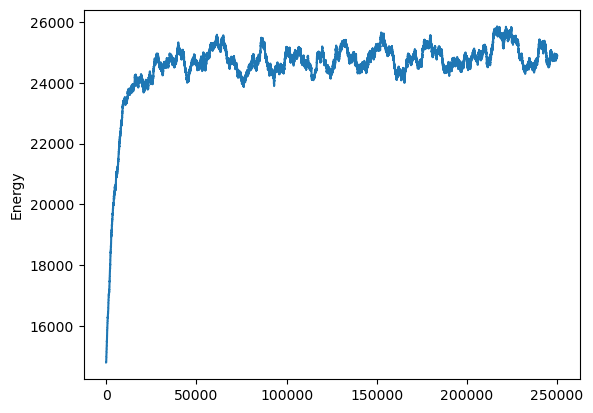

In [5]:
import numpy as np
from random import random, randrange
import matplotlib.pyplot as plt

kT = 10.0
N = 1000
steps = 250000

# Create a 2D array to store the quantum numbers
n = np.ones([N,3],int)

# Main loop
eplot = []
E = 3*N*np.pi*np.pi/2    # starting with state nx=ny=nz=1 for all particles
for k in range(steps):

    # Choose the particle
    i = randrange(N)
    # choose the quantum number
    j = randrange(3)   
    if random()<0.5:  # change quantum number by +1 or -1
        dn = 1        # increase by +1
        dE = (2*n[i,j]+1)*np.pi*np.pi/2
    else:
        dn = -1       # increase by -1
        dE = (-2*n[i,j]+1)*np.pi*np.pi/2

    # Decide whether to accept the move
    # there are two conditions here
    # no particle can exist in a state lower than ground state: n[i,j]>1
    # metropolis algorithm is imposed here: dn==1
    # if energy decreases or is equal, dn=-1, it is always accepted, but if energy increases, an additional check is imposed (it should increase according to Boltzmann probability distribution)
    if n[i,j]>1 or dn==1:
        if random()<np.exp(-dE/kT):   # Boltzmann probability distribution
            n[i,j] += dn
            E += dE

    eplot.append(E)

# Make the graph
plt.plot(eplot)
plt.ylabel("Energy")
plt.show()

# Try it yourself

### Total 4 marks

* Try a different initial state of the ideal gas above (choose any (integer value of $n_x$, $n_y$, $n_z$), and see how the results change.
* Try a larger number of steps and compute the average energy (using the last 10,000 points say).